In [144]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json


In [4]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [5]:
crash_data.shape

(48882, 35)

In [8]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

In [61]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2019) | (crash_data["Year"]==2020)
                            | (crash_data["Year"]==2021)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32271,-111.919900,33.360130,32272,3605175,2019/01/01 07:26:00+00,2019,Lakeshore Dr,Bell De Mar Dr,400.0,Not Junction Related,...,Driverless,NaN,NaN,North,Properly Parked,NaN,NaN,NaN,33.360130,-111.919900
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,...,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32273,-111.892010,33.407360,32274,3502322,2019/01/01 09:40:00+00,2019,Price Rd,Broadway Rd,-50.0,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407360,-111.892010
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,...,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42717,-111.909125,33.407541,42718,3889582,2021/12/30 23:47:00+00,2021,McClintock Dr,Broadway Rd,15.0,Intersection Related 206,...,Driver,120.0,Unknown,South,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407541,-111.909125
42718,-111.960944,33.422202,42719,3889440,2021/12/31 18:21:00+00,2021,Priest Dr,University Dr,95.0,Driveway Or Alley,...,Driver,30.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422202,-111.960944
42719,-111.963099,33.320138,42720,3891668,2021/12/31 22:28:00+00,2021,Priest Dr,Ray Rd,100.0,Driveway Or Alley,...,Driver,16.0,Female,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.320138,-111.963099
42720,-111.918919,33.363762,42721,3901953,2021/12/31 23:02:00+00,2021,Guadalupe Rd,Dorsey Ln,-195.0,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.363762,-111.918919


In [62]:
specific_year.count()

X                      10450
Y                      10450
OBJECTID               10451
Incidentid             10451
DateTime               10451
Year                   10451
StreetName             10451
CrossStreet            10450
Distance               10450
JunctionRelation       10450
Totalinjuries          10450
Totalfatalities        10450
Injuryseverity         10450
Collisionmanner        10450
Lightcondition         10450
Weather                10450
SurfaceCondition       10450
Unittype_One           10450
Age_Drv1               10445
Gender_Drv1            10234
Traveldirection_One    10450
Unitaction_One         10450
Violation1_Drv1        10445
AlcoholUse_Drv1        10445
DrugUse_Drv1           10445
Unittype_Two            9697
Age_Drv2                9328
Gender_Drv2             9307
Traveldirection_Two     9697
Unitaction_Two          9697
Violation1_Drv2         9328
AlcoholUse_Drv2         9328
DrugUse_Drv2            9328
Latitude               10450
Longitude     

In [63]:
Filter_data=specific_year.dropna(how='any')

In [64]:
Filter_data.count()

X                      9132
Y                      9132
OBJECTID               9132
Incidentid             9132
DateTime               9132
Year                   9132
StreetName             9132
CrossStreet            9132
Distance               9132
JunctionRelation       9132
Totalinjuries          9132
Totalfatalities        9132
Injuryseverity         9132
Collisionmanner        9132
Lightcondition         9132
Weather                9132
SurfaceCondition       9132
Unittype_One           9132
Age_Drv1               9132
Gender_Drv1            9132
Traveldirection_One    9132
Unitaction_One         9132
Violation1_Drv1        9132
AlcoholUse_Drv1        9132
DrugUse_Drv1           9132
Unittype_Two           9132
Age_Drv2               9132
Gender_Drv2            9132
Traveldirection_Two    9132
Unitaction_Two         9132
Violation1_Drv2        9132
AlcoholUse_Drv2        9132
DrugUse_Drv2           9132
Latitude               9132
Longitude              9132
dtype: int64

In [67]:
filtered_data["Unittype_One"].unique()

array(['Driver', 'Pedalcyclist', 'Pedestrian', 'Driverless', nan],
      dtype=object)

In [69]:
group_data= filtered_data.groupby(["Unittype_One"]).count()
filtered_data_df=group_data[["Incidentid"]]
filtered_data_df

,Incidentid
Unittype_One,
Driver,10129
Driverless,5
Pedalcyclist,206
Pedestrian,110


In [73]:
Driver_accident=Filter_data.loc[Filter_data["Unittype_One"]== "Driver", :]
Driver_accident

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
32272,-111.891090,33.418430,32273,3524937,2019/01/01 08:17:00+00,2019,Victory Dr,Price Rd,-150.0,Not Junction Related,...,Driver,118.0,Unknown,East,Properly Parked,No Improper Action,No Apparent Influence,No Apparent Influence,33.418430,-111.891090
32274,-111.940150,33.407390,32275,3462432,2019/01/01 12:24:00+00,2019,Broadway Rd,Mill Ave,-100.0,Not Junction Related,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.407390,-111.940150
32275,-111.967380,33.378300,32276,3470825,2019/01/01 18:39:00+00,2019,Baseline Rd,I-10 Exit 155 C2-Ramp,0.0,Intersection 201,...,Driver,78.0,Female,North,Making Right Turn,Unknown,No Apparent Influence,No Apparent Influence,33.378300,-111.967380
32276,-111.925660,33.422030,32277,3478968,2019/01/02 01:14:00+00,2019,University Dr,Rural Rd,200.0,Not Junction Related,...,Driver,26.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422030,-111.925660
32277,-111.909260,33.378420,32278,3470739,2019/01/02 02:22:00+00,2019,McClintock Dr,Baseline Rd,0.0,Intersection 4 Way 202,...,Driver,36.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378420,-111.909260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42714,-111.909264,33.377724,42715,3887727,2021/12/30 22:33:00+00,2021,McClintock Dr,Baseline Rd,-255.0,Not Junction Related,...,Driver,50.0,Male,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.377724,-111.909264
42715,-111.922522,33.416761,42716,3912886,2021/12/30 22:39:00+00,2021,Lemon St,Terrace Rd,-32.0,Intersection Related 206,...,Driver,33.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.416761,-111.922522
42716,-111.928542,33.355602,42717,3891726,2021/12/30 23:25:00+00,2021,Rural Rd,Divot Dr,0.0,Intersection T Inter 203,...,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.355602,-111.928542
42719,-111.963099,33.320138,42720,3891668,2021/12/31 22:28:00+00,2021,Priest Dr,Ray Rd,100.0,Driveway Or Alley,...,Driver,16.0,Female,North,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.320138,-111.963099


In [150]:
Driver_accident["AlcoholUse_Drv2"].unique()

array(['No Apparent Influence', 'Alcohol'], dtype=object)

In [129]:
cause_accident=Driver_accident.loc[(Driver_accident["AlcoholUse_Drv1"]== "Alcohol")
                                   ]
specific_coloumn=cause_accident[["Incidentid",
                                "AlcoholUse_Drv1", "Weather"
                                ]]
specific_coloumn

,Incidentid,AlcoholUse_Drv1,Weather
32413,3478810,Alcohol,Clear
32420,3479049,Alcohol,Clear
32421,3478840,Alcohol,Clear
32442,3479024,Alcohol,Clear
32468,3478979,Alcohol,Clear
...,...,...,...
42547,3889441,Alcohol,Clear
42556,3888253,Alcohol,Clear
42558,3899283,Alcohol,Clear
42580,3887703,Alcohol,Clear


In [139]:
alcohol_accident=specific_coloumn.groupby("Weather").count()
alcohol_accident

,Incidentid,AlcoholUse_Drv1
Weather,,
Clear,274,274
Cloudy,18,18
Rain,7,7
Unknown,8,8


<Axes: xlabel='Weather type', ylabel='Number of Incident'>

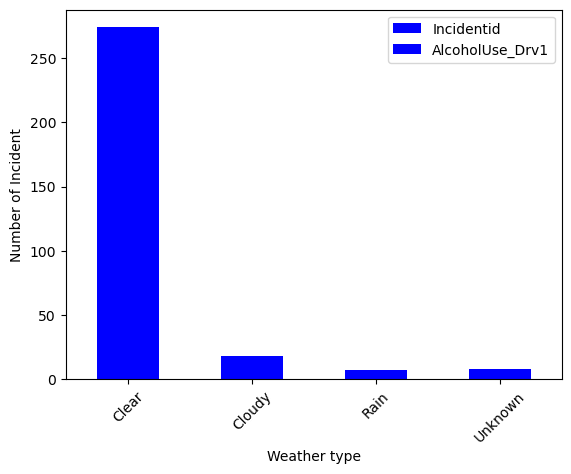

In [149]:
# Generate a bar plot showing the total number of collusion for each Unittype_One by the weather.

Figure1=alcohol_accident.plot(kind="bar", facecolor="b", xlabel="Weather type", ylabel="Number of Incident")
xticklabels=("Clear", "Cloudy", "Rain", "Unknown")
Figure1.set_xticklabels(xticklabels, rotation=45)
Figure1